# Analysis of the Integrated Gradients (EN-IG) Study Responses

In [1]:
library(mgcv)
library(itsadug)
library(hash)
library(stringr)
library(gratia)
packageVersion("mgcv") # make sure that this is at least 1.8.32

Loading required package: nlme

This is mgcv 1.8-38. For overview type 'help("mgcv-package")'.

Loading required package: plotfunctions

Loaded package itsadug 2.4 (see 'help("itsadug")' ).

Warning message:
“package ‘hash’ was built under R version 4.0.5”
hash-2.2.6.2 provided by Decision Patterns




[1] ‘1.8.38’

## Data

#### Loading

In [2]:
data = read.csv('../human_ratings/responses_correction.csv')

# set data types
data <- as.data.frame(unclass(data),
                      stringsAsFactors = TRUE)
data$dependency_relation = relevel(data$dependency_relation, ref=tail(names(sort(table(data$dependency_relation))), 1))
data$capitalization = relevel(data$capitalization, ref=tail(names(sort(table(data$capitalization))), 1))

# Levels
data$visualization_condition <- factor(data$visualization_condition, levels= c('saliency','bars','saliency-corrected'))

#### Cleaning

In [3]:
data <- subset(data, word_length<20)
data <- subset(data, completion_time_ms<60000) # that's one minute

## Ordinal GAMM

### Fit

In [4]:
set.seed(0)

model <- bam(human_importance_rating ~  visualization_condition + 
                                        s(saliency, by=visualization_condition, k=20) +
                                        s(display_index, by=visualization_condition) +
                                        s(word_length, by=visualization_condition) +
                                        s(sentence_length, by=visualization_condition) +
                                        s(relative_word_frequency, by=visualization_condition) +
                                        s(lemma_polarity, by=visualization_condition) +
                                        s(normalized_saliency_rank, by=visualization_condition) +
                                        s(word_position, by=visualization_condition) +
                                        s(capitalization, bs = "re", by=visualization_condition) +
                                        s(dependency_relation, bs = "re", by=visualization_condition) +
                                        s(condition_order, bs = "re", by=visualization_condition) +
                                        s(sentence_id, bs = "re") +
                                        s(sentence_id, saliency, bs = "re") +
                                        s(worker_id, bs = "re") +
                                        s(worker_id, saliency, bs = "re"),
                data = data,
                family = ocat(R=7),
                method = "fREML",
                discrete = TRUE,
                select = TRUE,
            )

### Analysis

#### Coefficients and Significance Tests

In [5]:
summary(model)


Family: Ordered Categorical(-1,0.95,2.37,3.67,5.06,6.83) 
Link function: identity 

Formula:
human_importance_rating ~ visualization_condition + s(saliency, 
    by = visualization_condition, k = 20) + s(display_index, 
    by = visualization_condition) + s(word_length, by = visualization_condition) + 
    s(sentence_length, by = visualization_condition) + s(relative_word_frequency, 
    by = visualization_condition) + s(lemma_polarity, by = visualization_condition) + 
    s(normalized_saliency_rank, by = visualization_condition) + 
    s(word_position, by = visualization_condition) + s(capitalization, 
    bs = "re", by = visualization_condition) + s(dependency_relation, 
    bs = "re", by = visualization_condition) + s(condition_order, 
    bs = "re", by = visualization_condition) + s(sentence_id, 
    bs = "re") + s(sentence_id, saliency, bs = "re") + s(worker_id, 
    bs = "re") + s(worker_id, saliency, bs = "re")

Parametric coefficients:
                                         

In [6]:
set.seed(0)
model_anova <- anova(model)
print(model_anova)


Family: Ordered Categorical(-1,0.95,2.37,3.67,5.06,6.83) 
Link function: identity 

Formula:
human_importance_rating ~ visualization_condition + s(saliency, 
    by = visualization_condition, k = 20) + s(display_index, 
    by = visualization_condition) + s(word_length, by = visualization_condition) + 
    s(sentence_length, by = visualization_condition) + s(relative_word_frequency, 
    by = visualization_condition) + s(lemma_polarity, by = visualization_condition) + 
    s(normalized_saliency_rank, by = visualization_condition) + 
    s(word_position, by = visualization_condition) + s(capitalization, 
    bs = "re", by = visualization_condition) + s(dependency_relation, 
    bs = "re", by = visualization_condition) + s(condition_order, 
    bs = "re", by = visualization_condition) + s(sentence_id, 
    bs = "re") + s(sentence_id, saliency, bs = "re") + s(worker_id, 
    bs = "re") + s(worker_id, saliency, bs = "re")

Parametric Terms:
                        df     F  p-value
visual

#### Plots

Summary:
	* visualization_condition : factor; set to the value(s): saliency. 
	* saliency : numeric predictor; with 30 values ranging from 0.000382 to 1.000000. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; set to the value(s): 0.000104300469045211. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.666666666666667. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* condition_order : factor; set to the value(s): saliency__saliency-corrected__bars. 
	* sentence_id : factor; set to the value(s): reviews-001325-0003. 
	* worker_id : factor; set to the value(s): 0f8baaf22e2efa8c1a4df6

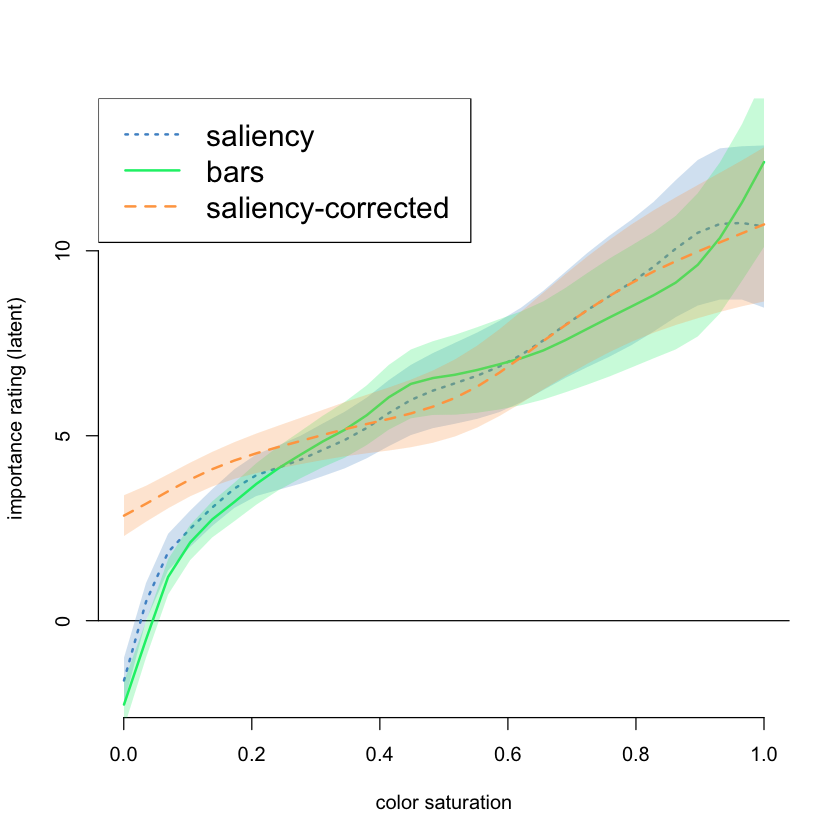


saliency window(s) of significant difference(s):
	0.000382 - 0.091256
	0.989903 - 1.000000
Summary:
	* saliency : numeric predictor; with 100 values ranging from 0.000382 to 1.000000. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; set to the value(s): 0.000104300469045211. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.666666666666667. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* condition_order : factor; set to the value(s): saliency__saliency-corrected__bars. 
	* sentence_id : factor; set to the value(s): reviews-001325-0003. 
	* worker_id : factor; set to the value(s)

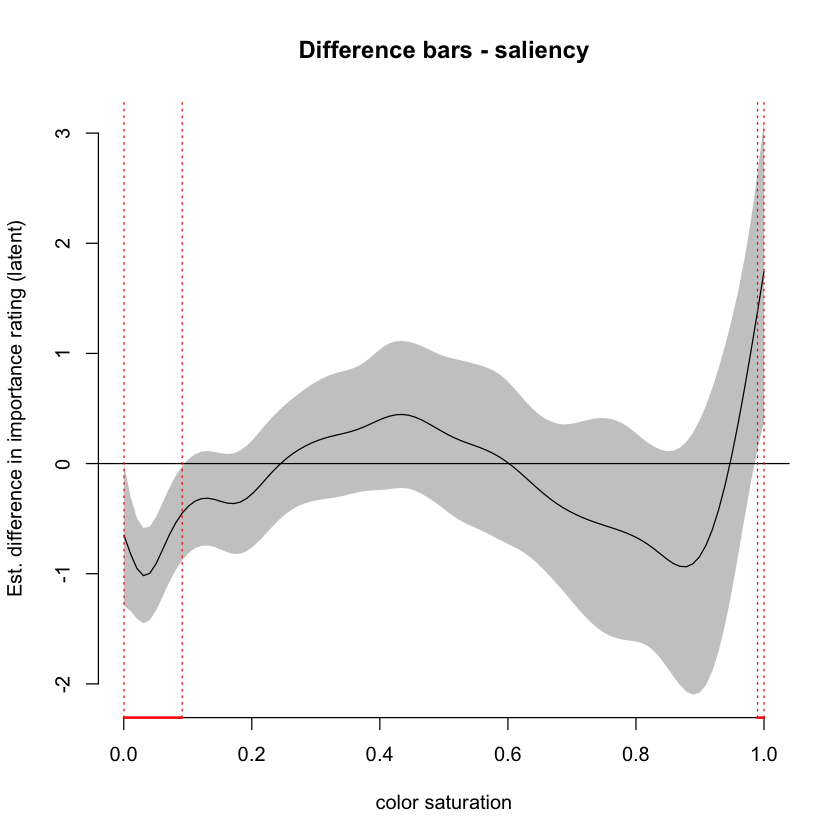


saliency window(s) of significant difference(s):
	0.000382 - 0.262908
Summary:
	* visualization_condition : factor; set to the value(s): saliency. 
	* saliency : numeric predictor; set to the value(s): 0.121. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; with 30 values ranging from 1.000000 to 14.000000. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; set to the value(s): 0.000104300469045211. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.666666666666667. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* condition_order : factor; set to the value(s): saliency__saliency-corrected__bars. 
	* sentence_id : factor; set to the value(s): reviews-0013

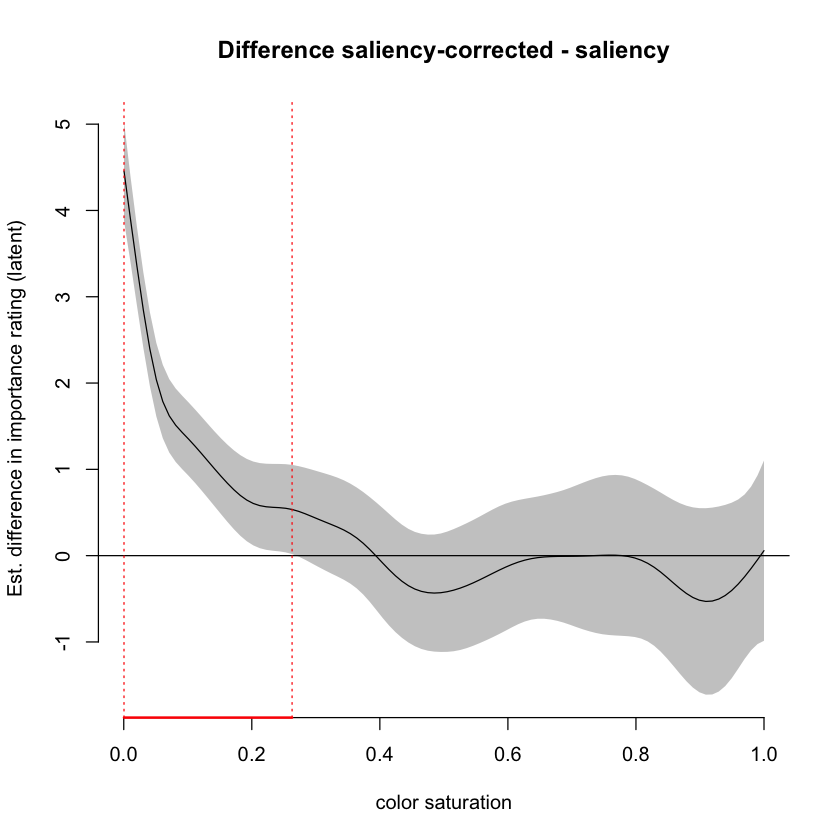

Summary:
	* visualization_condition : factor; set to the value(s): bars. 
	* saliency : numeric predictor; set to the value(s): 0.121. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; with 30 values ranging from 1.000000 to 14.000000. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; set to the value(s): 0.000104300469045211. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.666666666666667. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* condition_order : factor; set to the value(s): saliency__saliency-corrected__bars. 
	* sentence_id : factor; set to the value(s): reviews-001325-0003. 
	* worker_id : factor; set to the value(s): 0f8baaf22e2efa8c1a4df

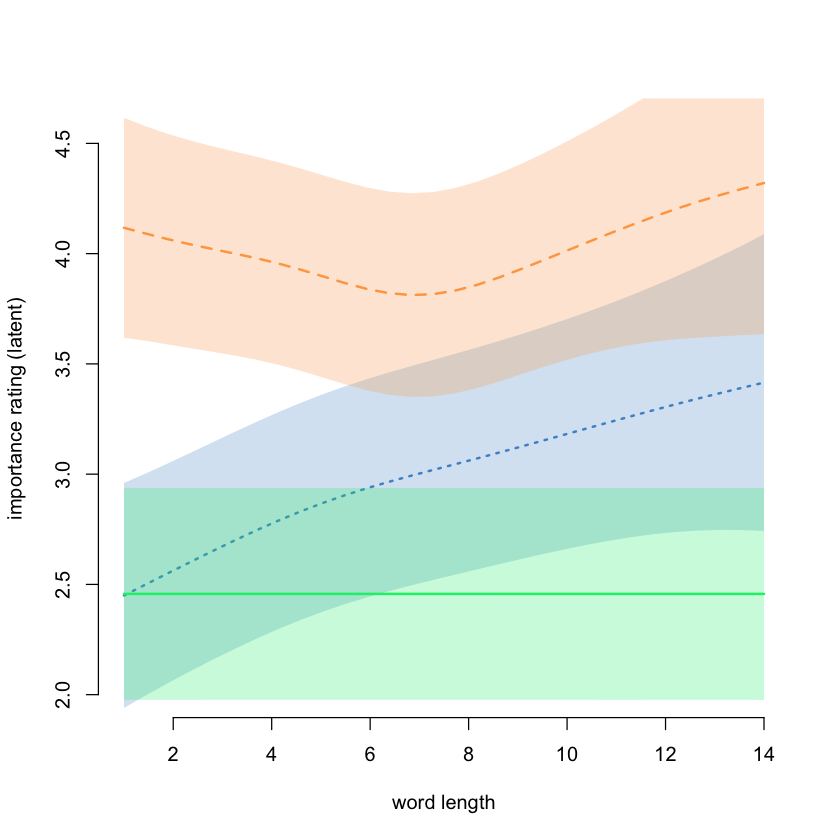


word_length window(s) of significant difference(s):
	5.333333 - 14.000000
Summary:
	* saliency : numeric predictor; set to the value(s): 0.121. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; with 100 values ranging from 1.000000 to 14.000000. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; set to the value(s): 0.000104300469045211. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.666666666666667. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* condition_order : factor; set to the value(s): saliency__saliency-corrected__bars. 
	* sentence_id : factor; set to the value(s): reviews-001325-0003. 
	* worker_id : factor; set to the value(s): 0f8baaf22e

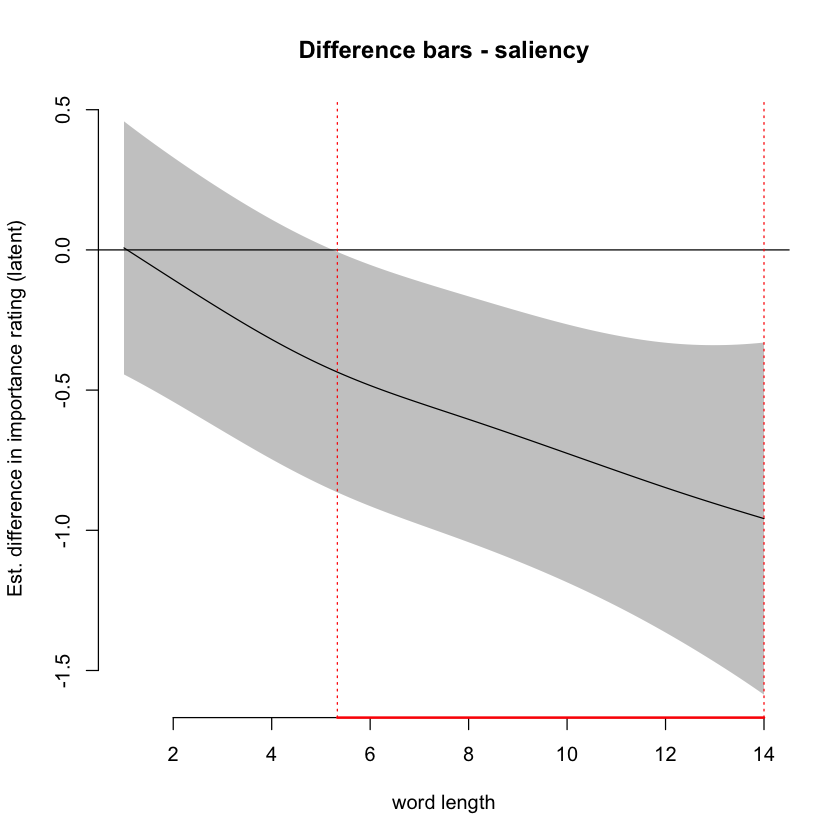


word_length window(s) of significant difference(s):
	1.000000 - 14.000000
Summary:
	* visualization_condition : factor; set to the value(s): saliency. 
	* saliency : numeric predictor; set to the value(s): 0.121. 
	* display_index : numeric predictor; with 30 values ranging from 0.000000 to 149.000000. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; set to the value(s): 0.000104300469045211. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.666666666666667. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* condition_order : factor; set to the value(s): saliency__saliency-corrected__bars. 
	* sentence_id : factor; set to the value(s): reviews-

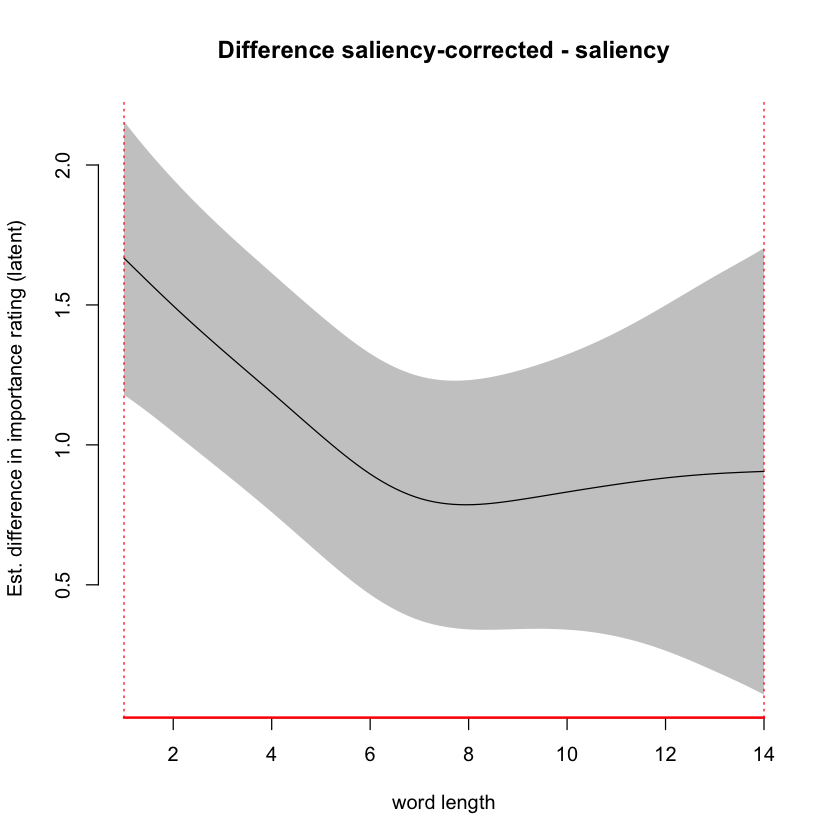

Summary:
	* visualization_condition : factor; set to the value(s): bars. 
	* saliency : numeric predictor; set to the value(s): 0.121. 
	* display_index : numeric predictor; with 30 values ranging from 0.000000 to 149.000000. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; set to the value(s): 0.000104300469045211. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.666666666666667. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* condition_order : factor; set to the value(s): saliency__saliency-corrected__bars. 
	* sentence_id : factor; set to the value(s): reviews-001325-0003. 
	* worker_id : factor; set to the value(s): 0f8baaf22e2efa8c1a4df

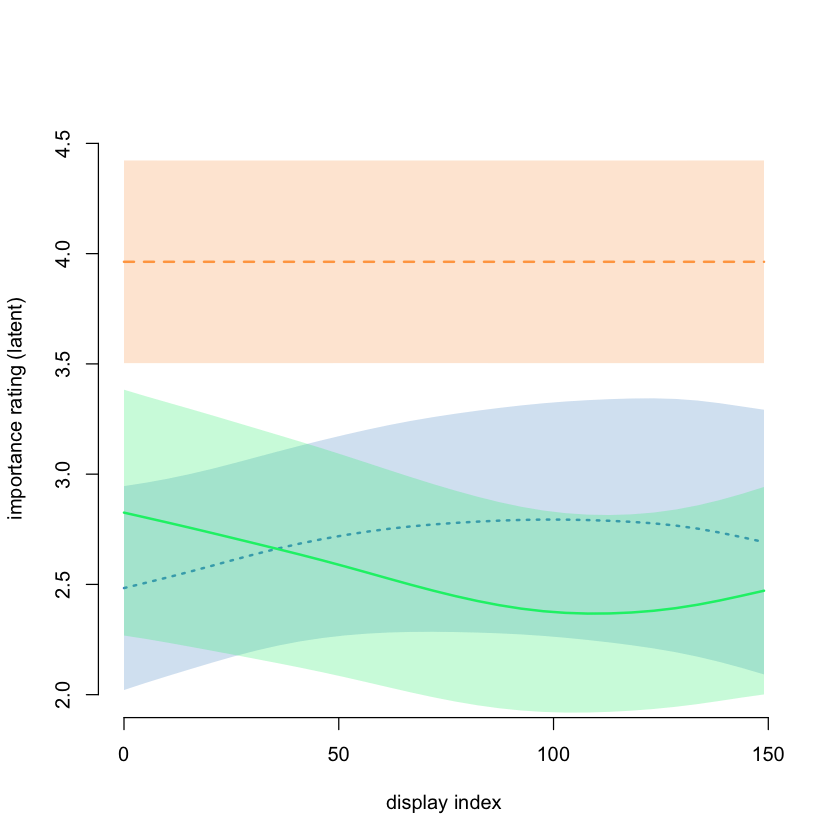


Difference is not significant.
Summary:
	* saliency : numeric predictor; set to the value(s): 0.121. 
	* display_index : numeric predictor; with 100 values ranging from 0.000000 to 149.000000. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; set to the value(s): 0.000104300469045211. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.666666666666667. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* condition_order : factor; set to the value(s): saliency__saliency-corrected__bars. 
	* sentence_id : factor; set to the value(s): reviews-001325-0003. 
	* worker_id : factor; set to the value(s): 0f8baaf22e2efa8c1a4df6623da26ebc05db0df44df91e8cbf4ad

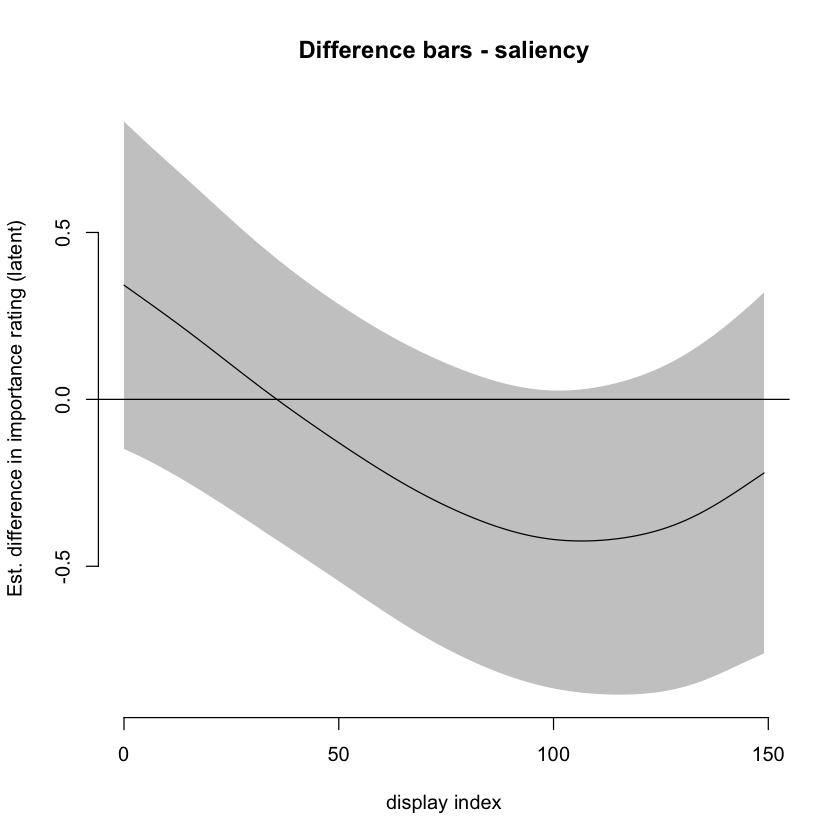


display_index window(s) of significant difference(s):
	0.000000 - 149.000000
Summary:
	* visualization_condition : factor; set to the value(s): saliency. 
	* saliency : numeric predictor; set to the value(s): 0.121. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; with 30 values ranging from 1.000000 to 11.000000. 
	* relative_word_frequency : numeric predictor; set to the value(s): 0.000104300469045211. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.666666666666667. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* condition_order : factor; set to the value(s): saliency__saliency-corrected__bars. 
	* sentence_id : factor; set to the value(s): revie

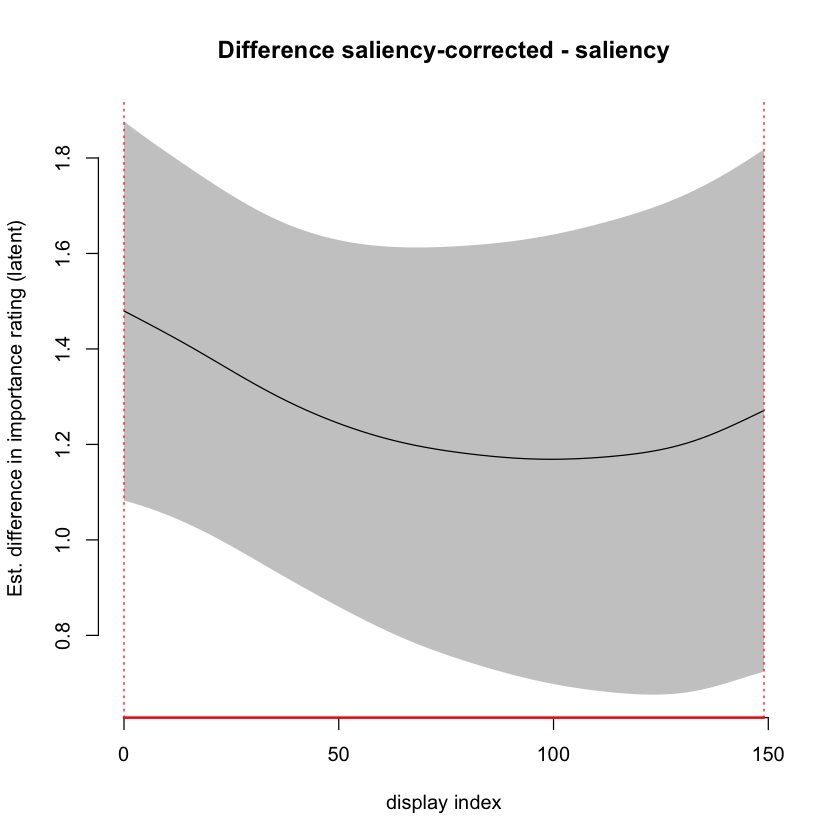

Summary:
	* visualization_condition : factor; set to the value(s): bars. 
	* saliency : numeric predictor; set to the value(s): 0.121. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; with 30 values ranging from 1.000000 to 11.000000. 
	* relative_word_frequency : numeric predictor; set to the value(s): 0.000104300469045211. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.666666666666667. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* condition_order : factor; set to the value(s): saliency__saliency-corrected__bars. 
	* sentence_id : factor; set to the value(s): reviews-001325-0003. 
	* worker_id : factor; set to the value(s): 0f8baaf22e2efa8c1a4df

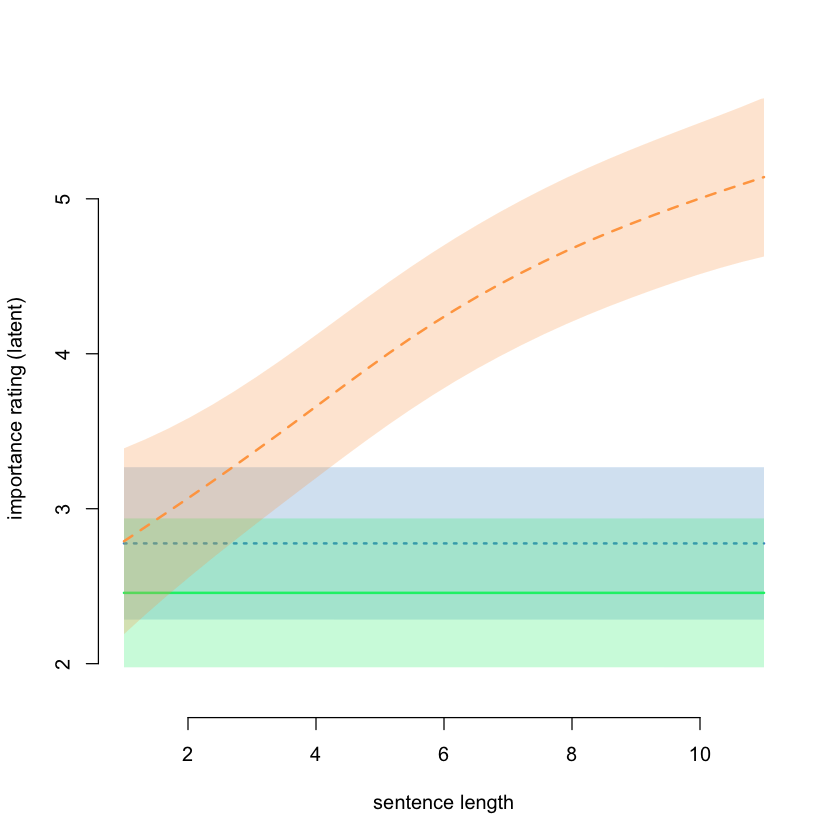


Difference is not significant.
Summary:
	* saliency : numeric predictor; set to the value(s): 0.121. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; with 100 values ranging from 1.000000 to 11.000000. 
	* relative_word_frequency : numeric predictor; set to the value(s): 0.000104300469045211. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.666666666666667. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* condition_order : factor; set to the value(s): saliency__saliency-corrected__bars. 
	* sentence_id : factor; set to the value(s): reviews-001325-0003. 
	* worker_id : factor; set to the value(s): 0f8baaf22e2efa8c1a4df6623da26ebc05db0df44df91e8cbf4ad

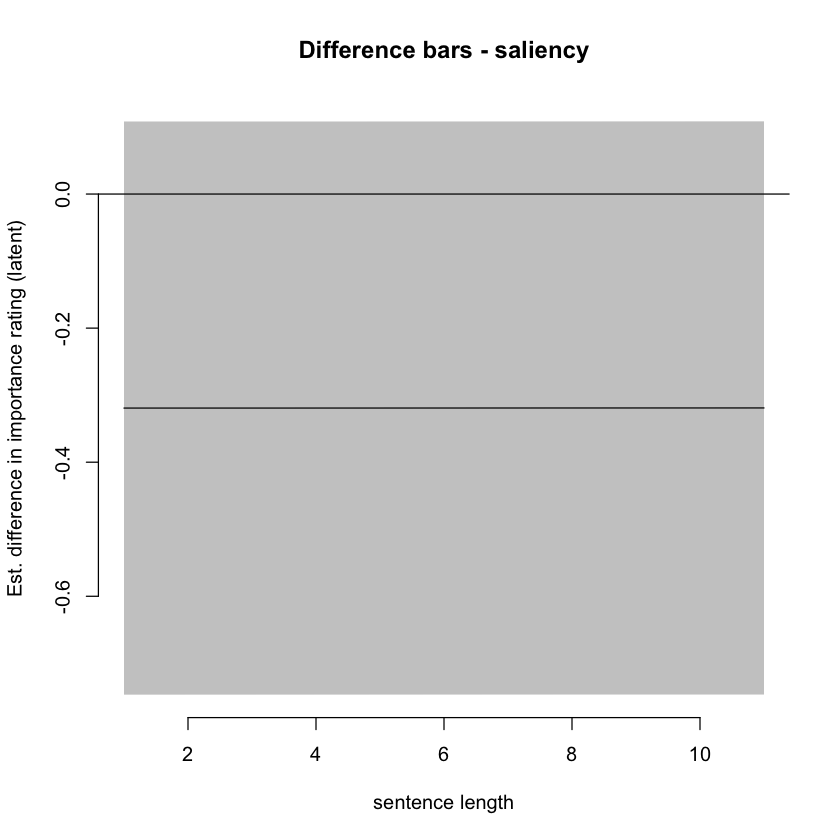


sentence_length window(s) of significant difference(s):
	2.616162 - 11.000000
Summary:
	* visualization_condition : factor; set to the value(s): saliency. 
	* saliency : numeric predictor; set to the value(s): 0.121. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; with 30 values ranging from 0.000000 to 0.133945. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.666666666666667. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* condition_order : factor; set to the value(s): saliency__saliency-corrected__bars. 
	* sentence_id : factor; set to the value(s): reviews-001325-0003. 
	*

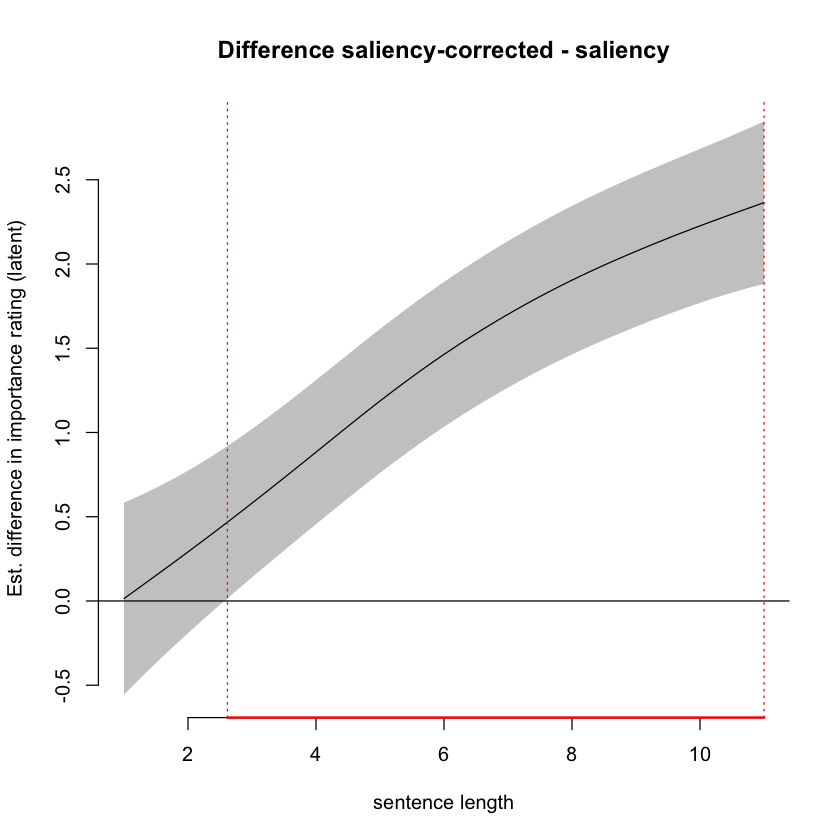

Summary:
	* visualization_condition : factor; set to the value(s): bars. 
	* saliency : numeric predictor; set to the value(s): 0.121. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; with 30 values ranging from 0.000000 to 0.133945. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.666666666666667. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* condition_order : factor; set to the value(s): saliency__saliency-corrected__bars. 
	* sentence_id : factor; set to the value(s): reviews-001325-0003. 
	* worker_id : factor; set to the value(s): 0f8baaf22e2efa8c1a4df6623da26ebc05db0df44

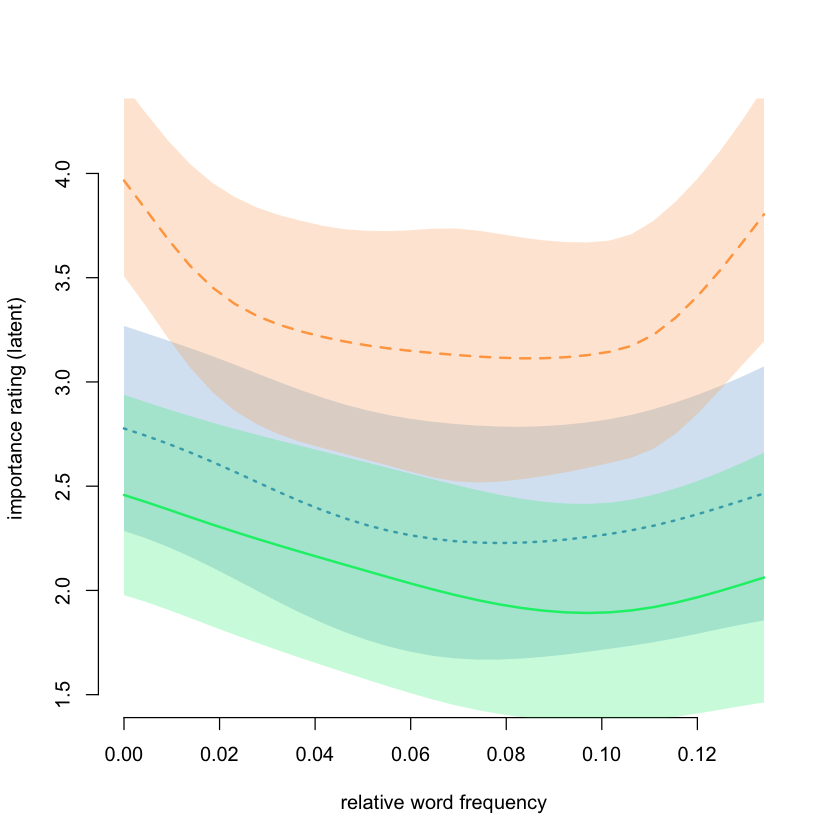


Difference is not significant.
Summary:
	* saliency : numeric predictor; set to the value(s): 0.121. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; with 100 values ranging from 0.000000 to 0.133945. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.666666666666667. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* condition_order : factor; set to the value(s): saliency__saliency-corrected__bars. 
	* sentence_id : factor; set to the value(s): reviews-001325-0003. 
	* worker_id : factor; set to the value(s): 0f8baaf22e2efa8c1a4df6623da26ebc05db0df44df91e8cbf4ad0d21aba5d05. 


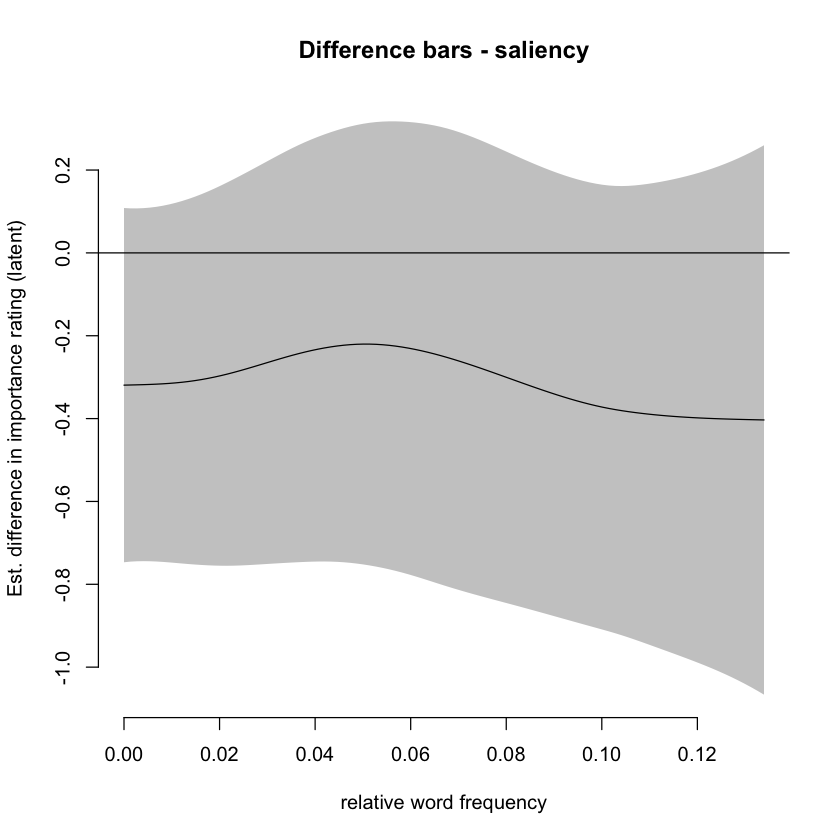


relative_word_frequency window(s) of significant difference(s):
	0.000000 - 0.133945
Summary:
	* visualization_condition : factor; set to the value(s): saliency. 
	* saliency : numeric predictor; set to the value(s): 0.121. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; set to the value(s): 0.000104300469045211. 
	* lemma_polarity : numeric predictor; with 30 values ranging from -0.795260 to 0.833950. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.666666666666667. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* condition_order : factor; set to the value(s): saliency__saliency-corrected__bars. 
	* sentence_id : factor; set to the value(s

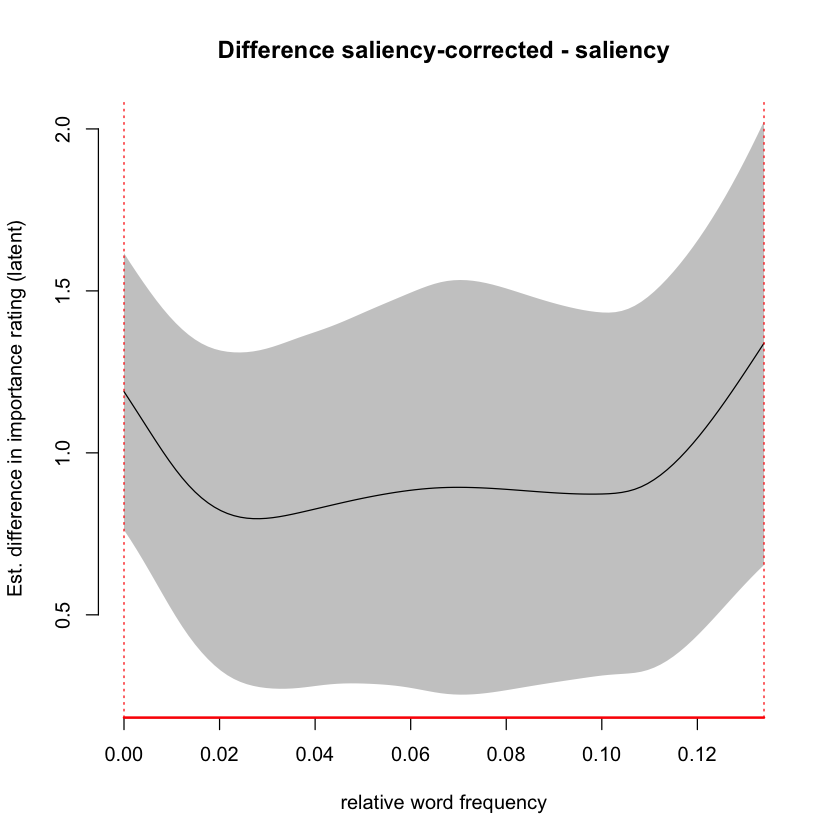

Summary:
	* visualization_condition : factor; set to the value(s): bars. 
	* saliency : numeric predictor; set to the value(s): 0.121. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; set to the value(s): 0.000104300469045211. 
	* lemma_polarity : numeric predictor; with 30 values ranging from -0.795260 to 0.833950. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.666666666666667. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* condition_order : factor; set to the value(s): saliency__saliency-corrected__bars. 
	* sentence_id : factor; set to the value(s): reviews-001325-0003. 
	* worker_id : factor; set to the value(s): 0f8baaf22e2efa8c1a4df

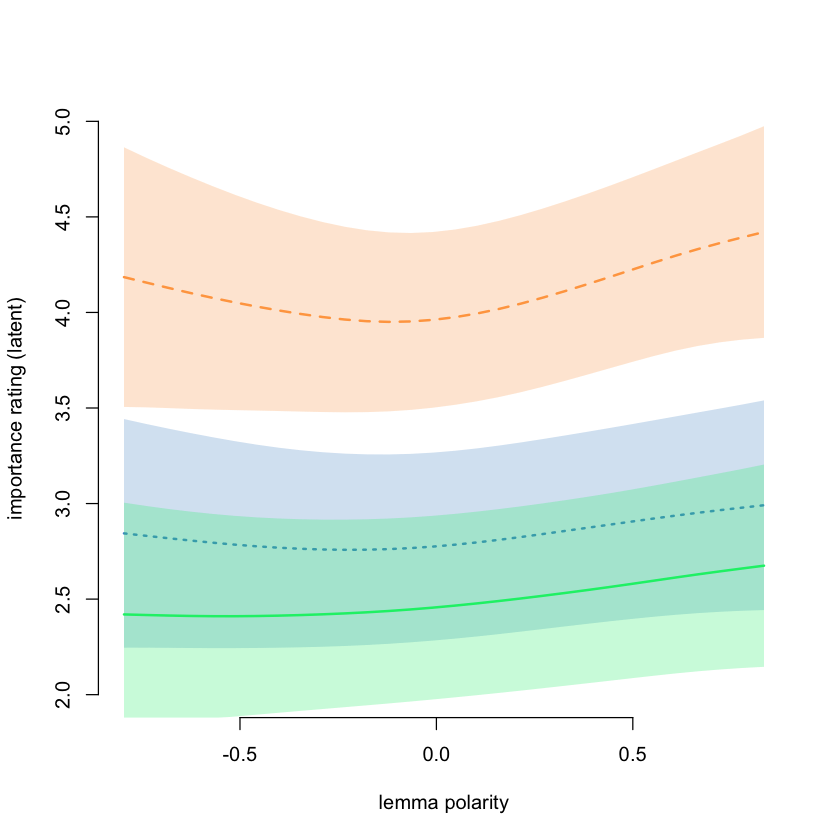


Difference is not significant.
Summary:
	* saliency : numeric predictor; set to the value(s): 0.121. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; set to the value(s): 0.000104300469045211. 
	* lemma_polarity : numeric predictor; with 100 values ranging from -0.795260 to 0.833950. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.666666666666667. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* condition_order : factor; set to the value(s): saliency__saliency-corrected__bars. 
	* sentence_id : factor; set to the value(s): reviews-001325-0003. 
	* worker_id : factor; set to the value(s): 0f8baaf22e2efa8c1a4df6623da26ebc05db0df44df91e8cbf4ad

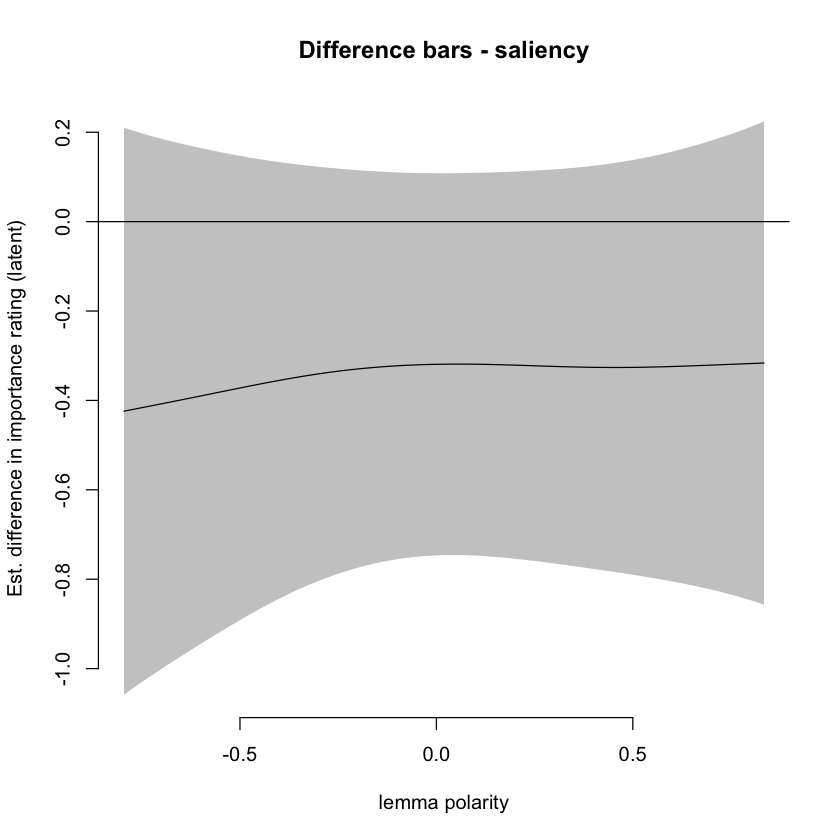


lemma_polarity window(s) of significant difference(s):
	-0.795260 - 0.833950
Summary:
	* visualization_condition : factor; set to the value(s): saliency. 
	* saliency : numeric predictor; set to the value(s): 0.121. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; set to the value(s): 0.000104300469045211. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; with 30 values ranging from 0.090909 to 1.000000. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* condition_order : factor; set to the value(s): saliency__saliency-corrected__bars. 
	* sentence_id : factor; set to the value(s): reviews-001325-0003. 


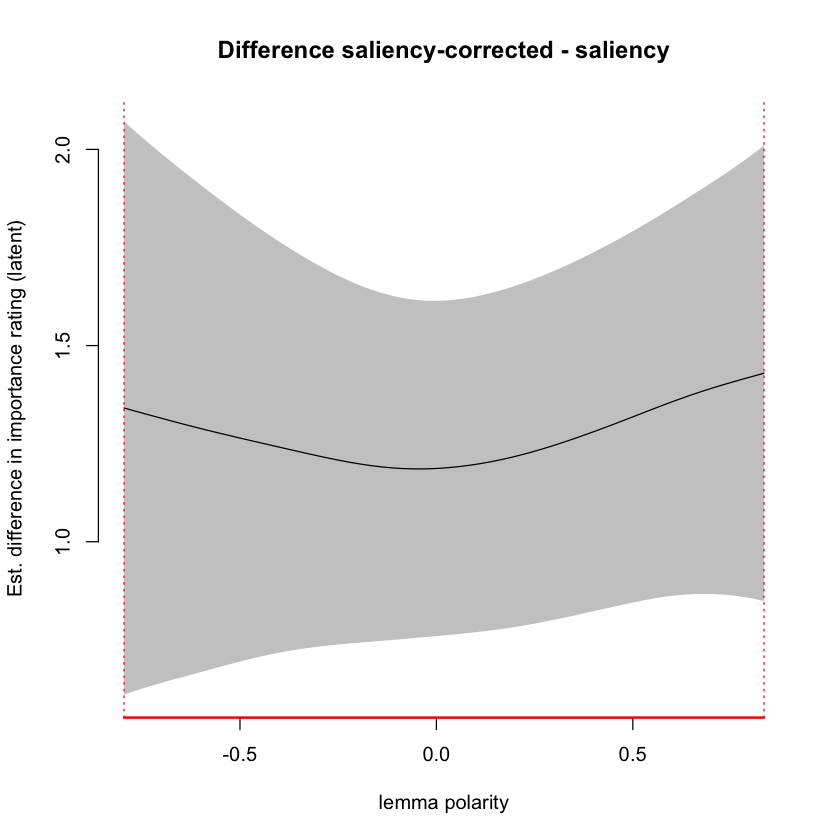

Summary:
	* visualization_condition : factor; set to the value(s): bars. 
	* saliency : numeric predictor; set to the value(s): 0.121. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; set to the value(s): 0.000104300469045211. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; with 30 values ranging from 0.090909 to 1.000000. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* condition_order : factor; set to the value(s): saliency__saliency-corrected__bars. 
	* sentence_id : factor; set to the value(s): reviews-001325-0003. 
	* worker_id : factor; set to the value(s): 0f8baaf22e2efa8c1a4df6623da26ebc05db0d

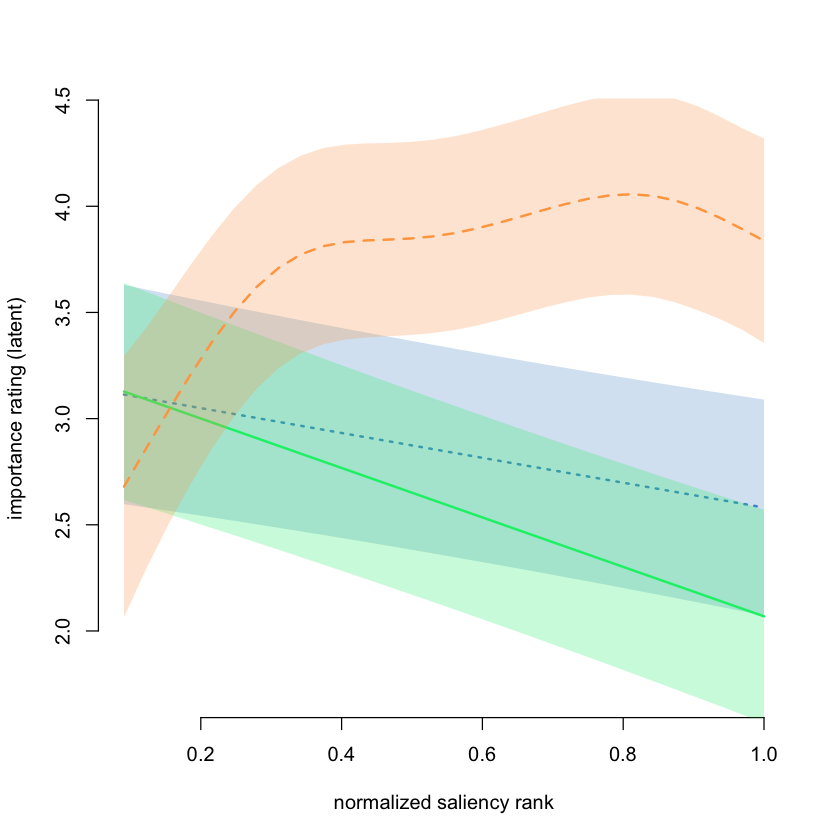


normalized_saliency_rank window(s) of significant difference(s):
	0.898990 - 1.000000
Summary:
	* saliency : numeric predictor; set to the value(s): 0.121. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; set to the value(s): 0.000104300469045211. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; with 100 values ranging from 0.090909 to 1.000000. 
	* word_position : numeric predictor; set to the value(s): 3. 
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* condition_order : factor; set to the value(s): saliency__saliency-corrected__bars. 
	* sentence_id : factor; set to the value(s): reviews-001325-0003. 
	* worker_id : factor; set to the value(s): 0f8baaf22e2efa8

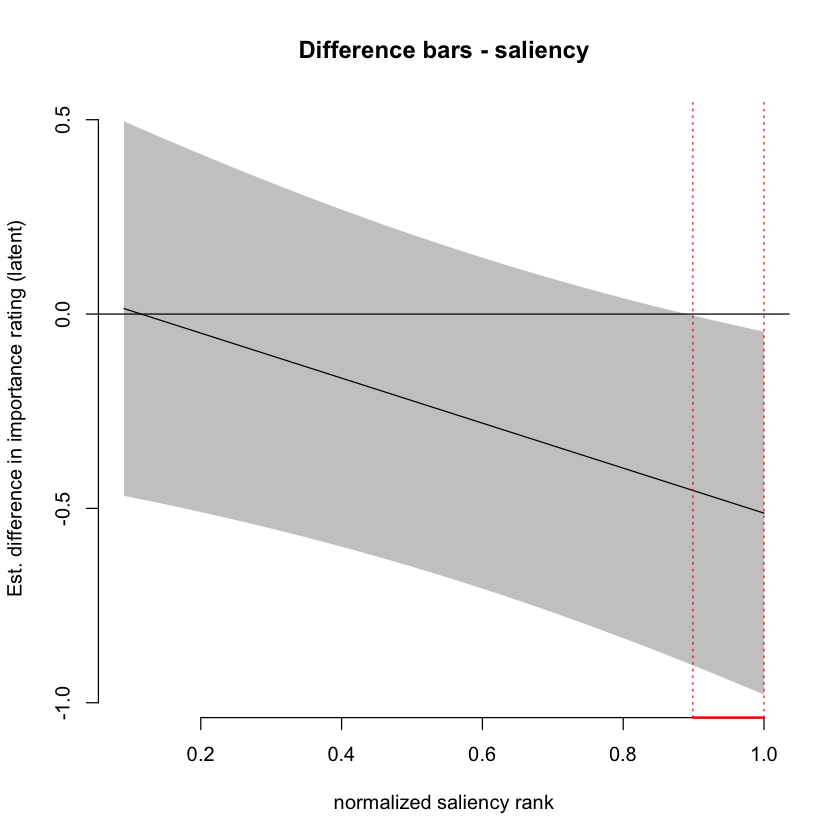


normalized_saliency_rank window(s) of significant difference(s):
	0.247016 - 1.000000
Summary:
	* visualization_condition : factor; set to the value(s): saliency. 
	* saliency : numeric predictor; set to the value(s): 0.121. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; set to the value(s): 0.000104300469045211. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.666666666666667. 
	* word_position : numeric predictor; with 30 values ranging from 1.000000 to 11.000000. 
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* condition_order : factor; set to the value(s): saliency__saliency-corrected__bars. 
	* sentence_id : factor; set to the value(

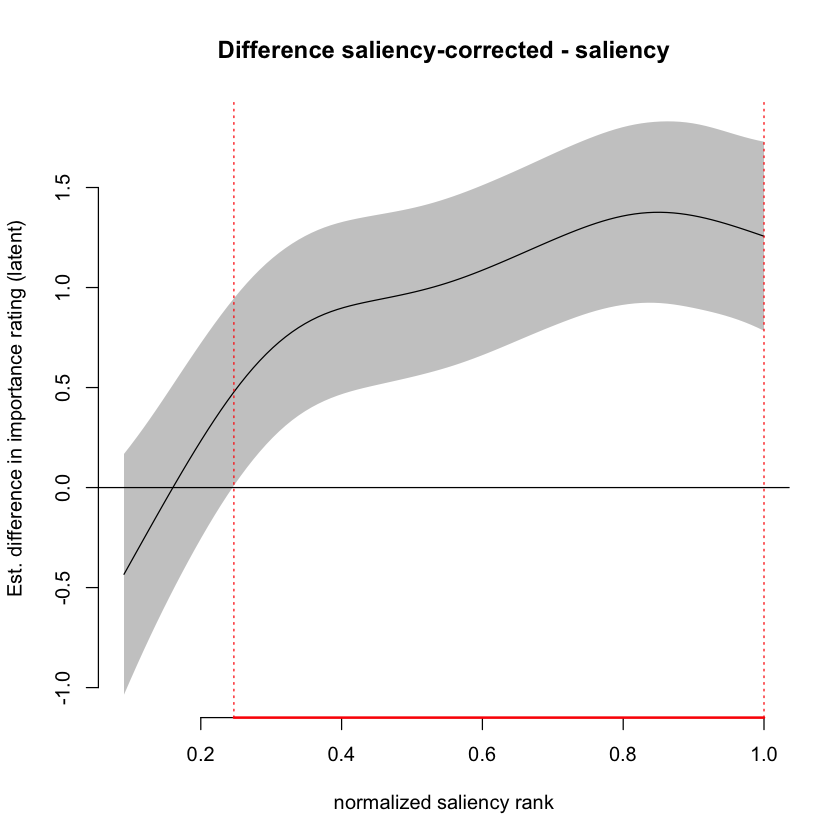

Summary:
	* visualization_condition : factor; set to the value(s): bars. 
	* saliency : numeric predictor; set to the value(s): 0.121. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; set to the value(s): 0.000104300469045211. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.666666666666667. 
	* word_position : numeric predictor; with 30 values ranging from 1.000000 to 11.000000. 
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* condition_order : factor; set to the value(s): saliency__saliency-corrected__bars. 
	* sentence_id : factor; set to the value(s): reviews-001325-0003. 
	* worker_id : factor; set to the value(s): 0f8baaf22e2efa8c1a4df

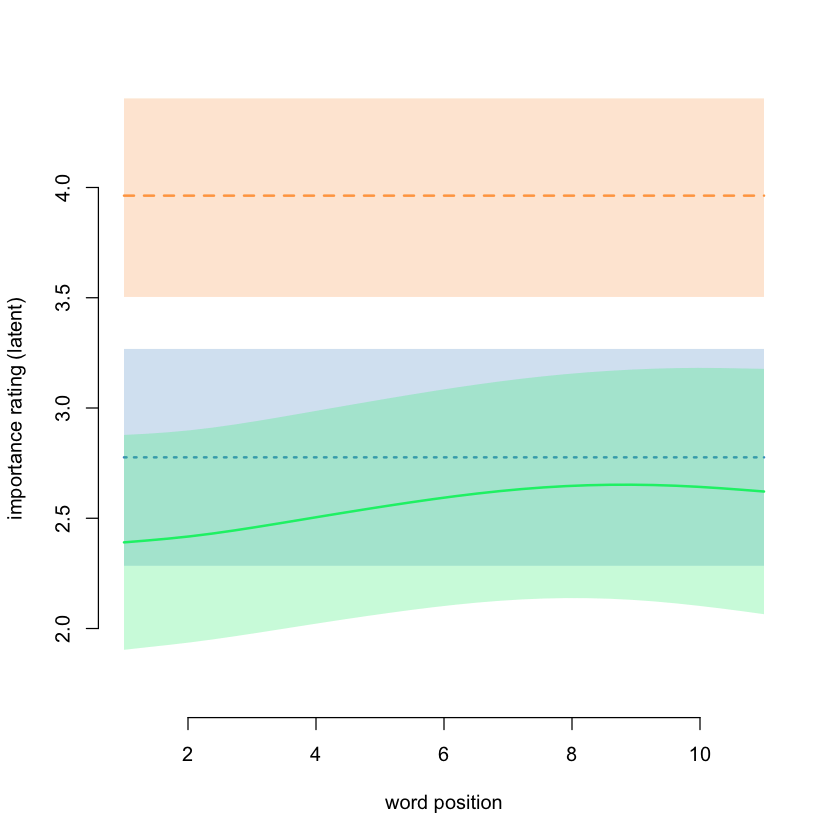


Difference is not significant.
Summary:
	* saliency : numeric predictor; set to the value(s): 0.121. 
	* display_index : numeric predictor; set to the value(s): 75. 
	* word_length : numeric predictor; set to the value(s): 4. 
	* sentence_length : numeric predictor; set to the value(s): 5. 
	* relative_word_frequency : numeric predictor; set to the value(s): 0.000104300469045211. 
	* lemma_polarity : numeric predictor; set to the value(s): 0. 
	* normalized_saliency_rank : numeric predictor; set to the value(s): 0.666666666666667. 
	* word_position : numeric predictor; with 100 values ranging from 1.000000 to 11.000000. 
	* capitalization : factor; set to the value(s): other. 
	* dependency_relation : factor; set to the value(s): root. 
	* condition_order : factor; set to the value(s): saliency__saliency-corrected__bars. 
	* sentence_id : factor; set to the value(s): reviews-001325-0003. 
	* worker_id : factor; set to the value(s): 0f8baaf22e2efa8c1a4df6623da26ebc05db0df44df91e8cbf4ad

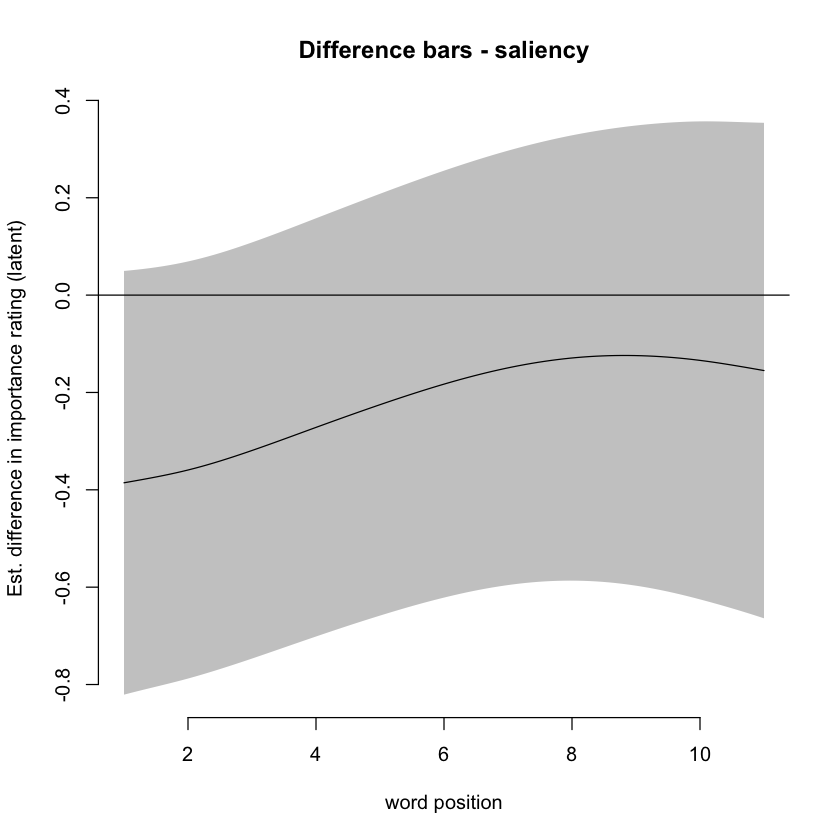


word_position window(s) of significant difference(s):
	1.000000 - 11.000000


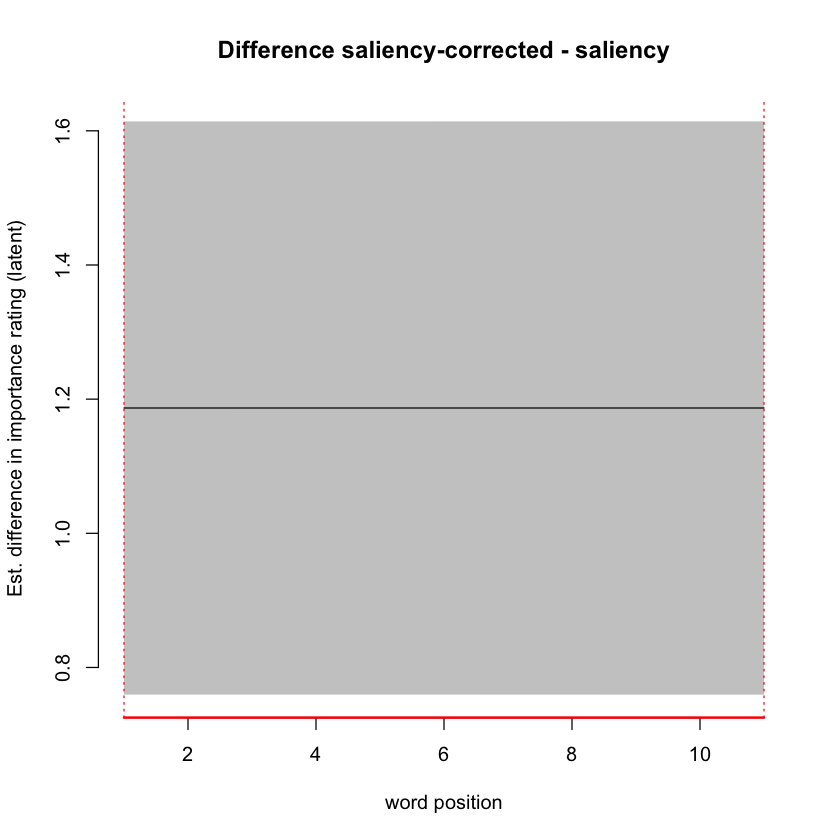

In [7]:
covariates = c("saliency",
               "word_length",
               "display_index",
               "sentence_length",
               "relative_word_frequency",
               "lemma_polarity",
               "normalized_saliency_rank",
               "word_position"
              )

# arbitrary worker ID
worker_id =  "0f8baaf22e2efa8c1a4df6623da26ebc05db0df44df91e8cbf4ad0d21aba5d05"

ylims <- list(c(-2,13.5),
              c(2,4.6),
              c(2,4.6),
              c(1.8,5.5),
              c(1.5,4.25),
              c(2,5),
              c(1.7,4.4),
              c(1.7,4.3)
             )
xlabs <- c("color saturation",
           "word length",
           "display index",
           "sentence length",
           "relative word frequency",
           "lemma polarity",
           "normalized saliency rank",
           "word position"
          )

for (i in 1:length(covariates)){
    covariate <- covariates[[i]]
    plot_smooth(model,
          view=covariate,
          cond=list(visualization_condition="saliency", worker_id=worker_id),
          rm.ranef=FALSE, 
          col='steelblue3',
          ylim=ylims[[i]],
          rug=FALSE,
          lty = 3,
          lwd=2,
          xlab=xlabs[[i]],
          ylab="importance rating (latent)",
          hide.label=TRUE
        )
    plot_smooth(model,
          view=covariate,
          cond=list(visualization_condition="bars", worker_id=worker_id),
          rm.ranef=FALSE, 
          rug=FALSE,
          add=TRUE,
          col='springgreen2',
          lty = 1,
          lwd=2)
    plot_smooth(model,
          view=covariate,
          cond=list(visualization_condition="saliency-corrected", worker_id=worker_id),
          rm.ranef=FALSE, 
          rug=FALSE,
          add=TRUE,
          col='tan1',
          lty = 2,
          lwd=2)
    if (i==1){
        legend(x = "topleft",
           legend = c("saliency", "bars", "saliency-corrected"), 
           lty = c(3, 1, 2),
           col = c("steelblue3", "springgreen2", "tan1"),
           lwd = 2,
           cex=1.5
          ) 
    }
    
    plot_diff(model,
              view=covariate,
              cond=list(worker_id=worker_id),
              comp=list(visualization_condition=c("bars", "saliency")),
              rm.ranef=FALSE,
              hide.label=TRUE,
              ylab="Est. difference in importance rating (latent)",
              xlab=xlabs[[i]]
             )
    
    plot_diff(model,
              view=covariate,
              cond=list(worker_id=worker_id),
              comp=list(visualization_condition=c("saliency-corrected", "saliency")),
              rm.ranef=FALSE,
              hide.label=TRUE,
              ylab="Est. difference in importance rating (latent)",
              xlab=xlabs[[i]]
             )
}